The following code includes EDA and preprocessing for data from the Synthea database, a synthetic health record database. 

git clone https://github.com/synthetichealth/synthea.git
cd synthea
./gradlew build check test

./gradlew run

Save synthea-with-dependencies.jar from github to synthea folder on server

java -jar synthea-with-dependencies.jar

Generate csv files for self-harm in adult cases:
java -jar synthea-with-dependencies.jar -m self_harm -p 1000000 --exporter.csv.export true --exporter.subfolders_by_id_substring true

In [80]:
import numpy as np
import os
import pandas as pd
import json
import warnings

# Load data
df = pd.read_csv('/Users/SarahA/synthea/output/csv/encounters.csv')

# Display column names
print(df.columns)

print(df.shape)

# Randomly sample 1,000,000 cases
#random_sample = df.sample(n=1000000, random_state=42)

# Save the randomly sampled data to a new file
#random_sample.to_csv('random_sampled_data.csv', index=False)

# Print the shape of the sampled data
#print(random_sample.shape)

/var/folders/dw/9kv692xj65d8csvjp0w67g740000gp/T/ipykernel_59776/1541910789.py:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/SarahA/synthea/output/csv/encounters.csv')


Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE',
       'REASONDESCRIPTION'],
      dtype='object')
(9143158, 15)


In [57]:
#df = pd.read_csv('/Users/SarahA/synthea/DATA1030-Fall2023/random_sampled_data.csv')

# Define keywords related to suicide
suicide_keywords = ['suicide', 'self-harm', 'suicidal']

# Create a binary variable 'SuicideRelatedEvent'
df['SuicideRelatedEvent'] = df['REASONDESCRIPTION'].str.lower().str.contains('|'.join(suicide_keywords))

# Fill NaN values with 0 (assuming 0 indicates events that are not related to suicide)
df['SuicideRelatedEvent'] = df['SuicideRelatedEvent'].fillna(0).astype(int)

# Print the 'SuicideRelatedEvent' column
print(df['SuicideRelatedEvent'])

# Print counts of 'SuicideRelatedEvent'
counts = df['SuicideRelatedEvent'].value_counts()
print(counts)

# Filter the DataFrame to include only suicide-related events
suicide_related_events = df[df['SuicideRelatedEvent'] == 1]

# Display unique suicide-related event descriptions
unique_suicide_related_events = suicide_related_events['REASONDESCRIPTION'].unique()
for event in unique_suicide_related_events:
    print(event)

0          0
1          0
2          0
3          0
4          0
          ..
9143153    0
9143154    0
9143155    0
9143156    0
9143157    0
Name: SuicideRelatedEvent, Length: 9143158, dtype: int64
SuicideRelatedEvent
0    9142766
1        392
Name: count, dtype: int64
Suicidal deliberate poisoning
Attempted suicide - suffocation
Attempted suicide - cut/stab
Suicide - suffocation
Suicide - firearms


In [64]:
# Determine visit types and display counts
visit_counts = df['ENCOUNTERCLASS'].value_counts()

# Print the counts of each visit type
print(visit_counts)

# Filter the DataFrame to identify cases related to suicide
suicide_related_cases = df[df['SuicideRelatedEvent'] == 1]

# Extract the year from a datetime column and create a new 'year' variable
df['year'] = df['STOP'].str[:4]

# Convert the 'year' variable to an integer if needed
df['year'] = df['year'].astype(int)

# Find the minimum and maximum year values
min_year = df['year'].min()
max_year = df['year'].max()

# Display the year range
print(f"Year Range: {min_year} to {max_year}")

# Separate the feature matrix X, and target variable y
y = df['SuicideRelatedEvent'] # remember, we want to predict who has a suicide-related event
X = df.loc[:, df.columns != 'SuicideRelatedEvent'] # all other columns are features
print(y)
print(X.head())

ENCOUNTERCLASS
wellness      7785915
outpatient    1356856
ambulatory        289
emergency          98
Name: count, dtype: int64
Year Range: 1935 to 2023
0          0
1          0
2          0
3          0
4          0
          ..
9143153    0
9143154    0
9143155    0
9143156    0
9143157    0
Name: SuicideRelatedEvent, Length: 9143158, dtype: int64
                                     Id                 START  \
0  dc480f47-4365-4839-c645-4d870655b796  2015-04-04T08:31:49Z   
1  06748e72-1329-8ed8-d040-2f90c1b9c155  2014-09-30T14:01:43Z   
2  20b67f36-b9a2-a7c6-dc90-45ea7471d5ff  2014-02-20T20:32:13Z   
3  445b7eaf-42f3-7966-266f-c32e69fd0e5a  2016-07-24T09:08:14Z   
4  17348c43-c824-1b96-ad22-36ab197336bb  2014-04-08T14:16:30Z   

                   STOP                               PATIENT  \
0  2015-04-04T08:46:49Z  97e06525-62bc-068d-e54f-9db109c31837   
1  2014-09-30T14:16:43Z  830448db-cf4c-4e98-b2c9-fe5babc8fdbb   
2  2014-02-20T20:47:13Z  de60ca01-481a-81ee-8739-2a66e0b2b4f

In [ ]:
from sklearn.preprocessing import OneHotEncoder

/var/folders/dw/9kv692xj65d8csvjp0w67g740000gp/T/ipykernel_59776/654180859.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['REASONDESCRIPTION']).plot.barh()


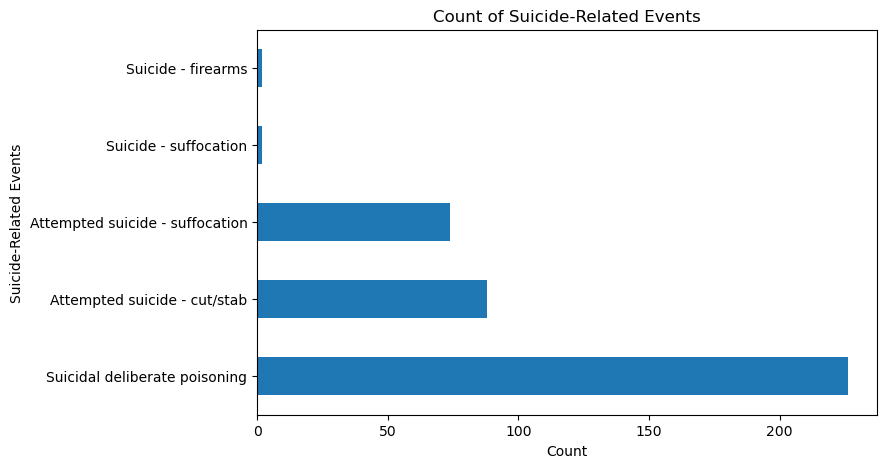

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar chart of suicide-related events
plt.figure(figsize=(8, 5)) 
pd.value_counts(df['REASONDESCRIPTION']).plot.barh()
plt.xlabel('Count')
plt.ylabel('Suicide-Related Events')
plt.title('Count of Suicide-Related Events')
plt.show()


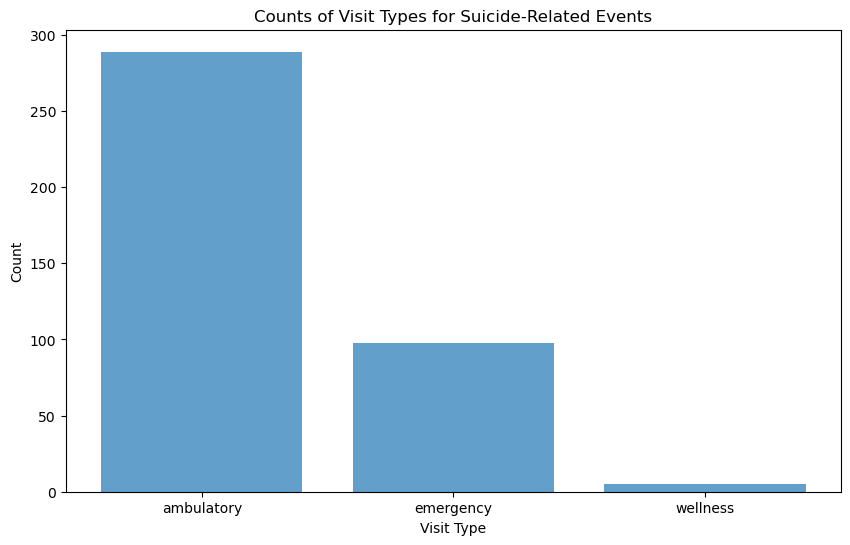

In [61]:
# Filter the DataFrame to include only suicide-related events
suicide_related = df[df['SuicideRelatedEvent'] == 1]

# Count visit types for suicide-related events
suicide_visit_counts = suicide_related['ENCOUNTERCLASS'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(suicide_visit_counts.index, suicide_visit_counts, alpha=0.7)

plt.xlabel('Visit Type')
plt.ylabel('Count')
plt.title('Counts of Visit Types for Suicide-Related Events')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

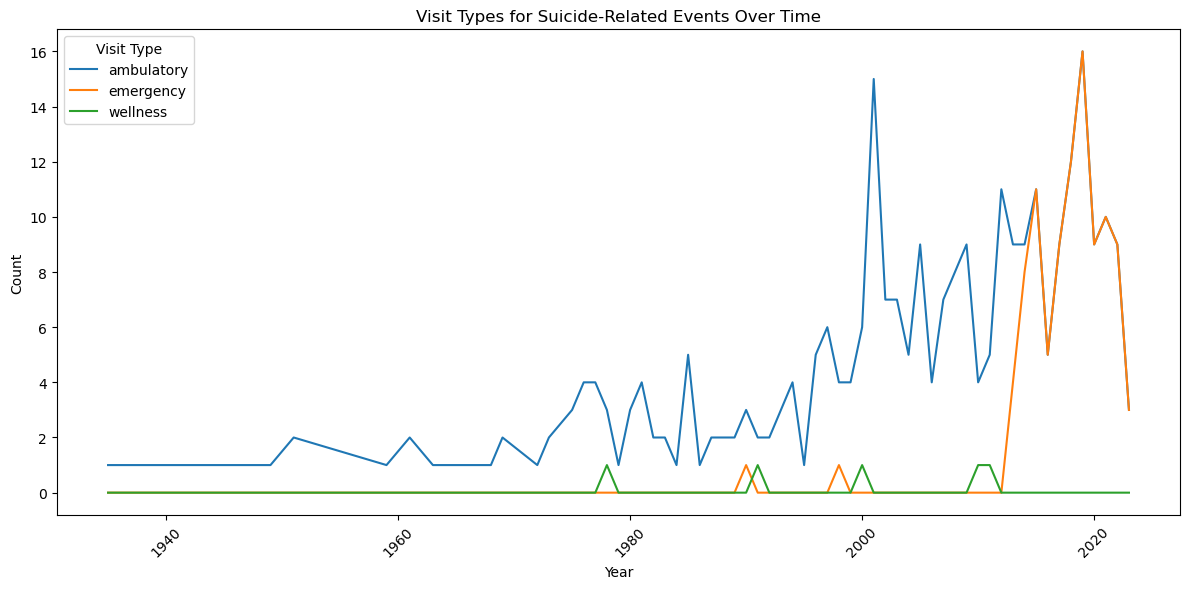

In [75]:
# Filter the DataFrame to include only suicide-related events
suicide_related = df[df['SuicideRelatedEvent'] == 1]

# Count visit types for suicide-related events by year
suicide_visit_counts = suicide_related.groupby(['year', 'ENCOUNTERCLASS']).size().unstack(fill_value=0)

# Create a line plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
for visit_type in suicide_visit_counts.columns:
    plt.plot(suicide_visit_counts.index, suicide_visit_counts[visit_type], label=visit_type)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Visit Types for Suicide-Related Events Over Time')
plt.legend(title='Visit Type')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensure proper spacing

plt.show()

In [ ]:
#Clear cases if visit type is missing

In [79]:
from sklearn.model_selection import train_test_split, KFold

random_state = 2

# Split the data into train, validation, and test sets
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=random_state)

print('Test balance:', np.unique(y_test, return_counts=True))

# Perform K-Fold cross-validation on the 'X_train' and 'y_train' data
kf = KFold(n_splits=4, shuffle=True, random_state=random_state)
for train_index, val_index in kf.split(X_train):
    print('New fold')
    X_train_fold = X_train.iloc[train_index]
    y_train_fold = y_train.iloc[train_index]
    X_val_fold = X_train.iloc[val_index]
    y_val_fold = y_train.iloc[val_index]

    # Now, you can use X_train_fold, y_train_fold, X_val_fold, and y_val_fold for training and validation

    print(np.unique(y_train_fold, return_counts=True))
    print(np.unique(y_val_fold, return_counts=True))

Test balance: (array([0, 1]), array([1828564,      68]))
New fold
(array([0, 1]), array([4114246,     174]))
(array([0, 1]), array([1371412,      62]))
New fold
(array([0, 1]), array([4114250,     170]))
(array([0, 1]), array([1371408,      66]))
New fold
(array([0, 1]), array([4114226,     195]))
(array([0, 1]), array([1371432,      41]))
New fold
(array([0, 1]), array([4114252,     169]))
(array([0, 1]), array([1371406,      67]))
